# Introduction

[**Content**](#):
1. Load and Check Data
2. Variable Description
   - Univariate Variable Analysis  => Her bir değişkenin tek başına incelenmesi...
       - Categorical Variables
       - Numerical Variables
3. Basic Data Analysis
4. Outlier Detection
5. Missing Value
   - Find Missing Value
   - Fill Missing Value
6. Visualization
    - Correlation between Sibsp - Parch - Age - Fare - Survived
    - Sibsp -- Survived
    - PClass -- Survived
    - Age -- Survived
    - Pclass -- Survived -- Age
    - Embarked -- Sex -- Fare -- Survived
    - Fill Missing, Age Feature:
7. Feature Engineering
8. Modeling
   - Train Test Split
   - Simple Logistic Regression
   - Hyperparameter Tunning - Grid Search - Cross Validation
   - Prediction and Submission

In [161]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

# Dosyaların tam yollarını almak için kullanılır
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Load And Check Data

In [162]:
train_df = pd.read_csv("../data/train.csv")

X_test = pd.read_csv("../data/test.csv")
y_test = pd.read_csv("../data/gender_submission.csv")

X_test["Survived"] = y_test["Survived"]
train_df = pd.concat([train_df, X_test])

In [163]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [164]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Variable Description

In [166]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


## Univariate Variable Analysis

- Categorical: Survived, Pclass, Embarked, Cabin, SibSp, Parch, Name, Sex, Ticket
- Numeric Variables: Fare, age, PassengerId


### Categorical Variables

In [167]:
def bar_plot(variable):
    
    # get feature
    var = train_df[variable]
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(ticks=varValue.index, labels=varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print(f"{variable}: \n {varValue}")

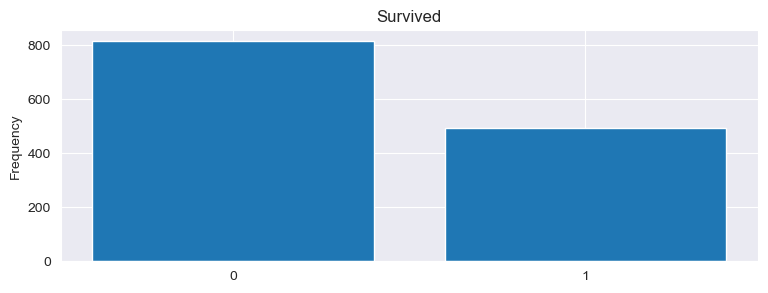

Survived: 
 Survived
0    815
1    494
Name: count, dtype: int64


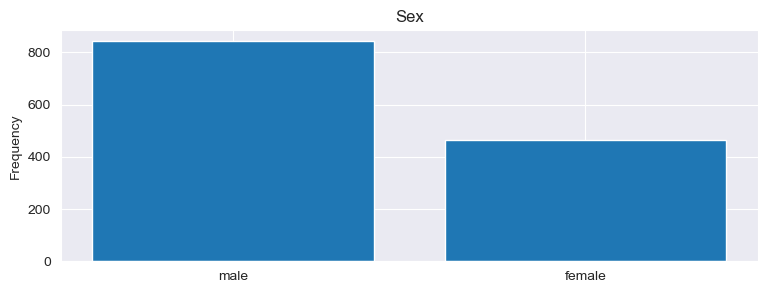

Sex: 
 Sex
male      843
female    466
Name: count, dtype: int64


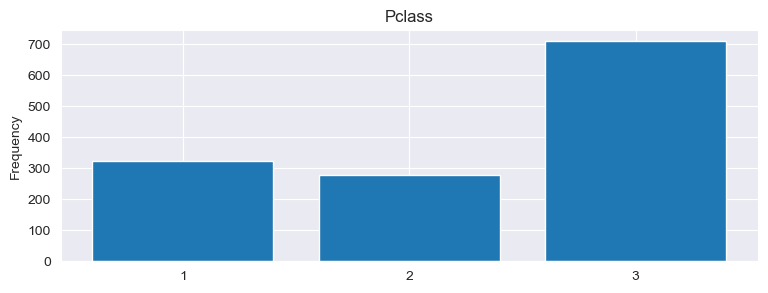

Pclass: 
 Pclass
3    709
1    323
2    277
Name: count, dtype: int64


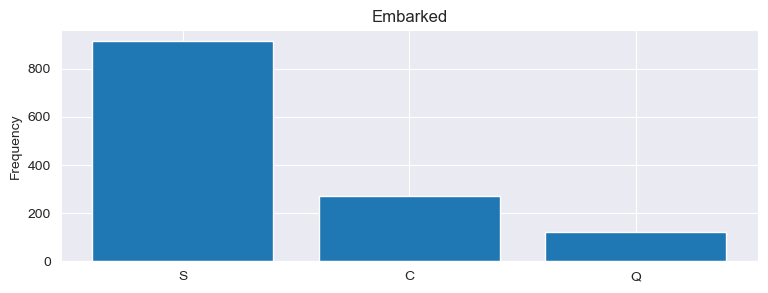

Embarked: 
 Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


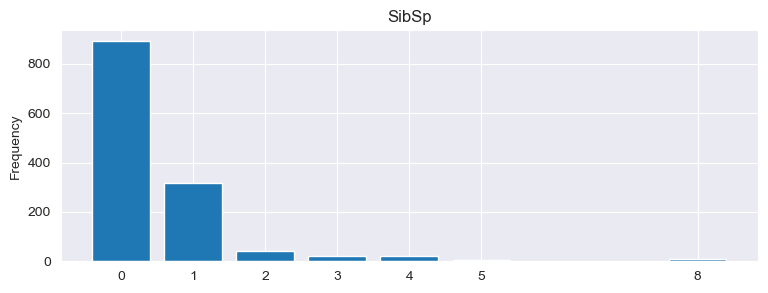

SibSp: 
 SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


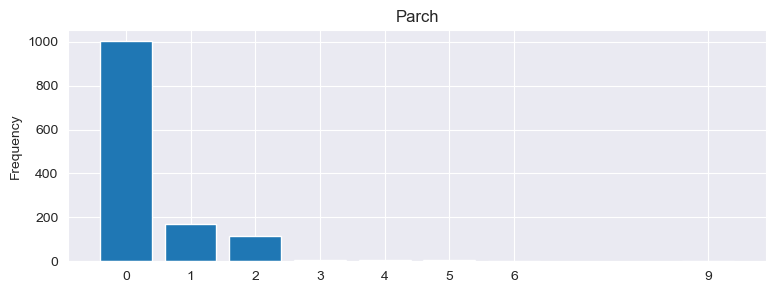

Parch: 
 Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


In [168]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [169]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print(f"{train_df[c].value_counts()}\n ")

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64
 
Name
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: count, Length: 1307, dtype: int64
 
Ticket
CA. 2343        11
CA 2144          8
160

### Numerical Variable

In [170]:
def plot_hist(variable):

    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with hist")
    plt.show()

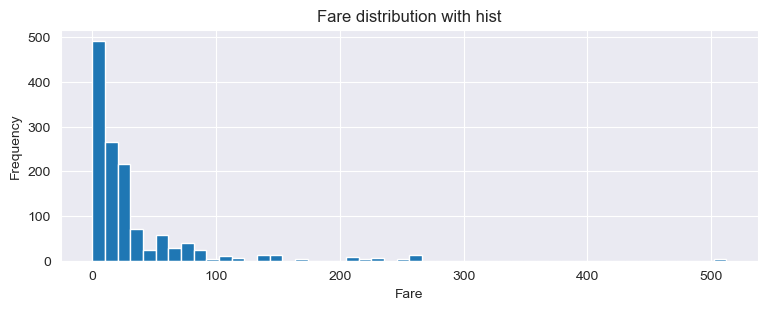

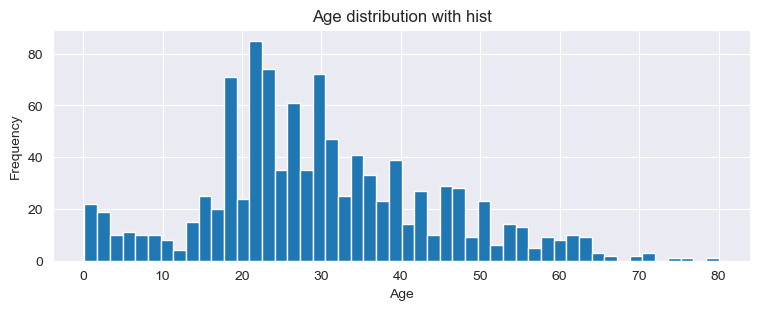

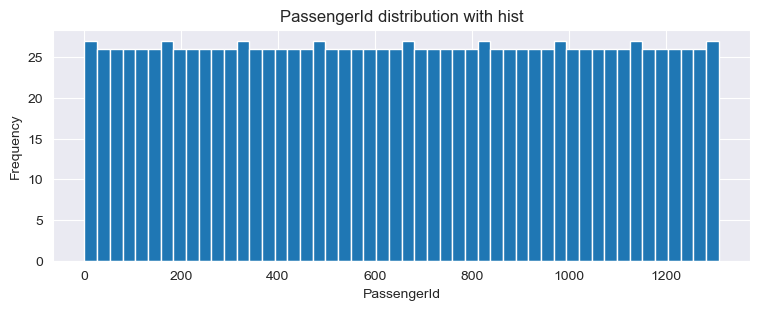

In [171]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic Data Analysis

In [172]:
# Pclass vs Survived
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.575851
1,2,0.422383
2,3,0.269394


In [173]:
# Sex - Survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.82618
1,male,0.12930


In [174]:
# SibSp vs Survived
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.520376
2,2,0.452381
0,0,0.334456
3,3,0.250000
4,4,0.181818
5,5,0.166667
6,8,0.111111


In [175]:
# Parch vs Survived
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.625000
1,1,0.547059
2,2,0.530973
7,9,0.500000
4,4,0.333333
0,0,0.331337
5,5,0.166667
6,6,0.000000


# Outlier Detection

In [176]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)

        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [177]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.00,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
159,1051,1,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.00,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.00,3,1,349909,21.0750,NaN,S
374,1266,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.00,1,1,33638,81.8583,A34,S


In [178]:
# Drop Outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis=0).reset_index(drop=True)

# Missing Value

In [179]:
train_df_len = len(train_df)

## Find Missing Values

In [180]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [181]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            258
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          997
Embarked         2
dtype: int64

## Fill Missing Values
- Embarked has 2 missing value

In [182]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
819,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


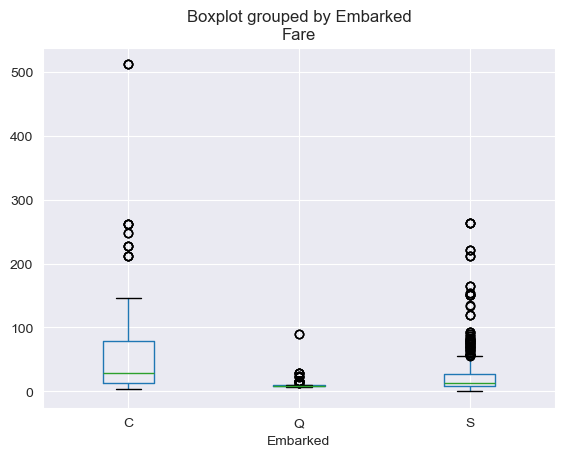

In [183]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [184]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Visualization

Featurelar arasındaki korelasyonu inceleme...

### Correlation Between SibSp - Parch - Age - Fare - Survived

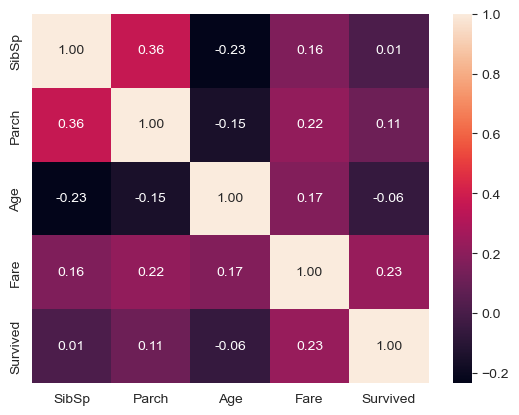

In [185]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")
plt.show()

## Sibsp -- Survived

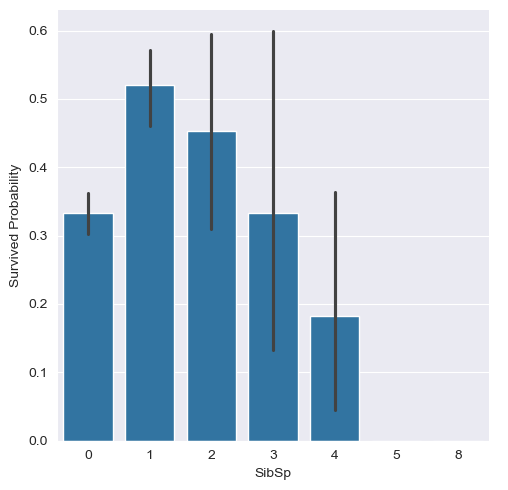

In [186]:
g = sns.catplot(x= "SibSp", y = "Survived", data= train_df, kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

## PClass -- Survived

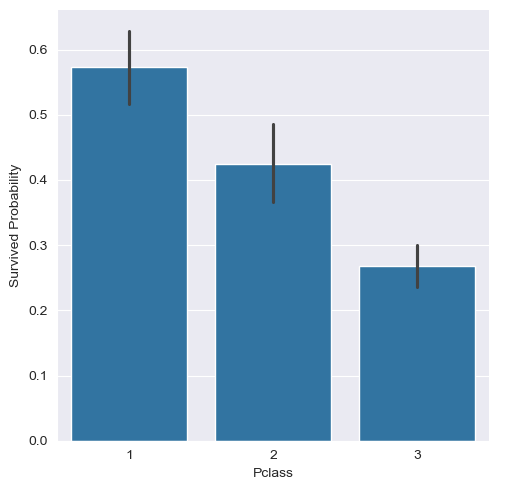

In [187]:
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

## Age -- Survived

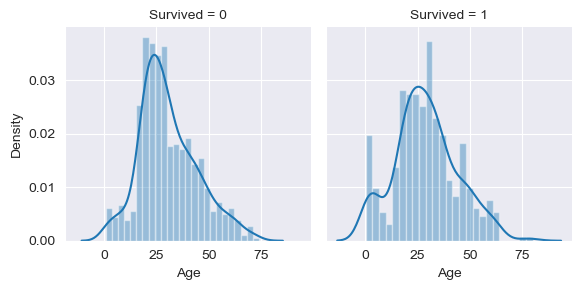

In [188]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

## Pclass -- Survived -- Age

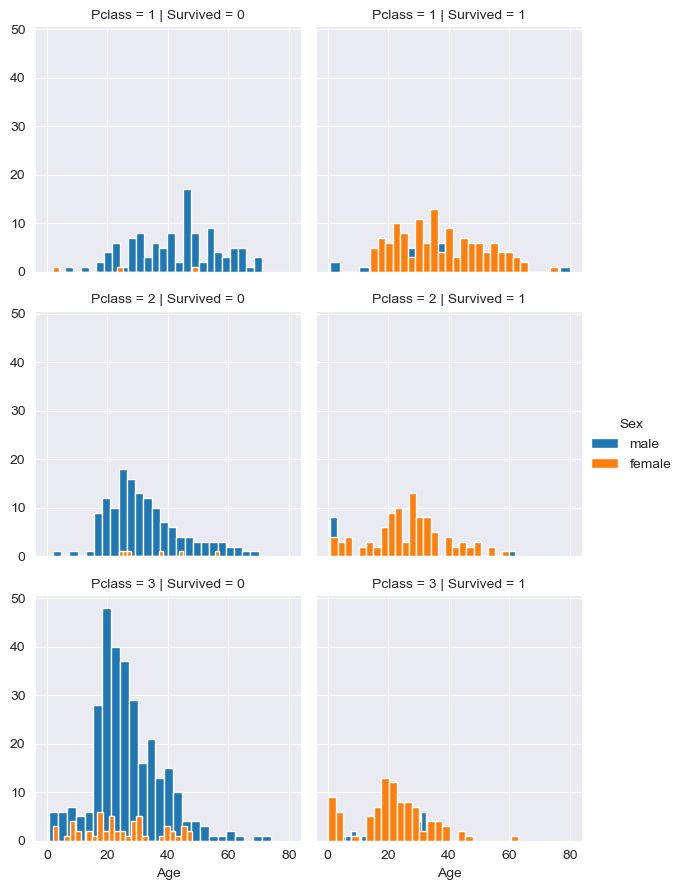

In [189]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass", hue="Sex")
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

## Embarked -- Sex -- Fare -- Survived

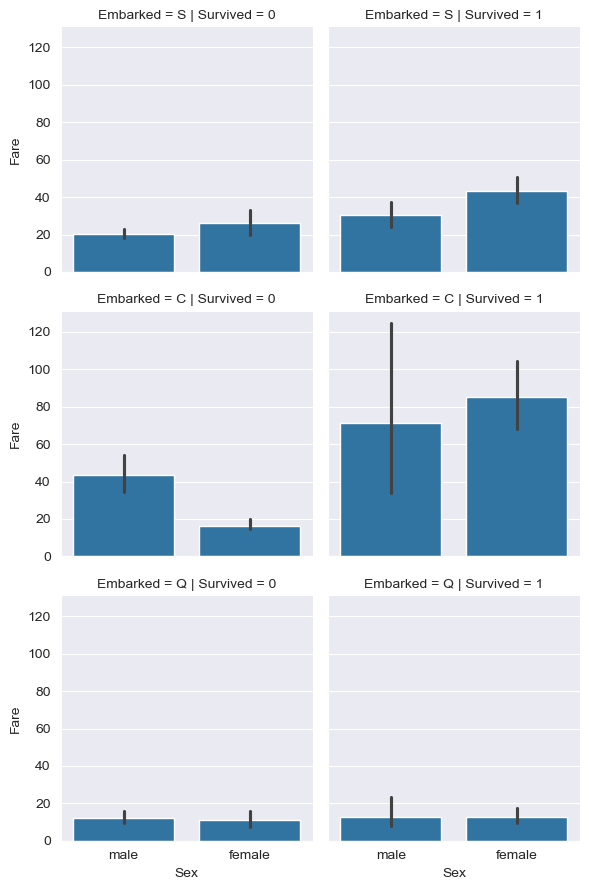

In [190]:
g = sns.FacetGrid(train_df, row="Embarked", col="Survived")
g.map(sns.barplot, "Sex", "Fare")
plt.show()

## Fill Missing, Age Feature: 

In [191]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
24,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
26,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1280,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1281,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1284,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1287,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


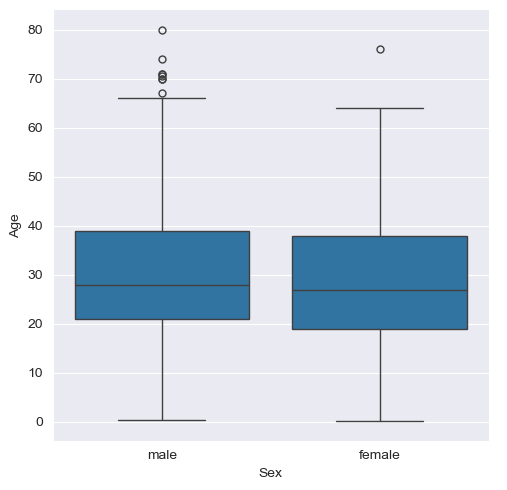

In [192]:
sns.catplot(x="Sex", y="Age",data=train_df, kind="box")
plt.show()

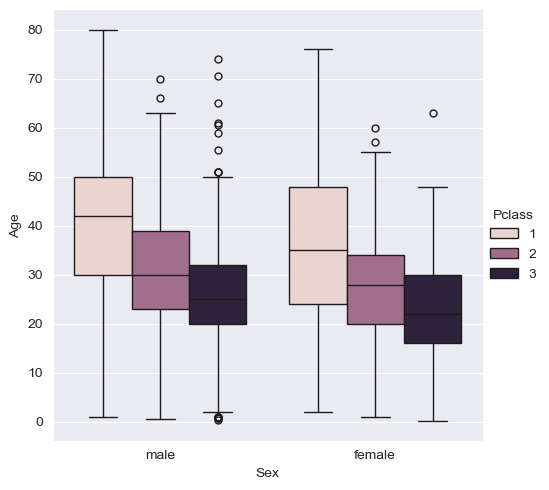

In [193]:
sns.catplot(x="Sex", y= "Age", hue="Pclass", data=train_df, kind="box")
plt.show()

In [194]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    # Yaşı kayıp olan kişi ile SibSp Parch ve Pclass değerleri aynı olan kişileri getir ve medyan değerini al.
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & 
                                (train_df["Parch"] == train_df.iloc[i]["Parch"]) & 
                                (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_median = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_median

In [195]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Feature Engineering

### Name -- Title

In [196]:
# Name'lere bakarak yeni bir feature çıkarımı yapabilir miyiz onu gözlemliyoruz. Mesela burada ünvanlara göre bir feature extraction yapabiliriz.
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
8                  Nasser, Mrs. Nicholas (Adele Achem)
9                      Sandstrom, Miss. Marguerite Rut
Name: Name, dtype: object

In [197]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(10)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
7     Mrs
8     Mrs
9    Miss
Name: Title, dtype: object

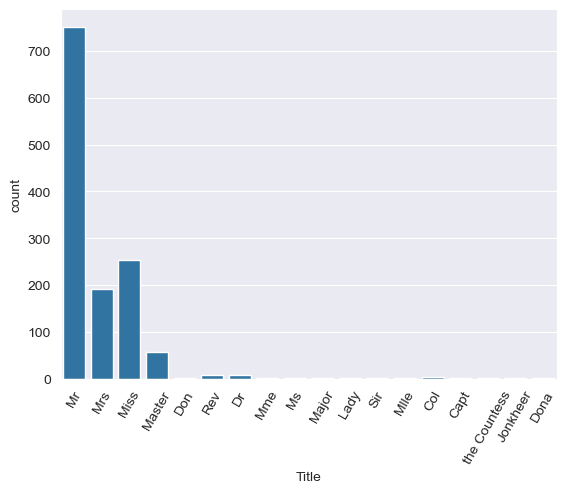

In [198]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

In [199]:
# Convert Categorical
train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Jonkheer", "Capt", "Col", "Sir", "Lady", "Major", "Mme", "Dr", "Rev", "Don"], "other") # Kaldırılabilir...
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     1
8     1
9     1
10    1
11    2
12    2
13    1
14    1
15    0
16    2
17    1
18    1
19    2
Name: Title, dtype: int64

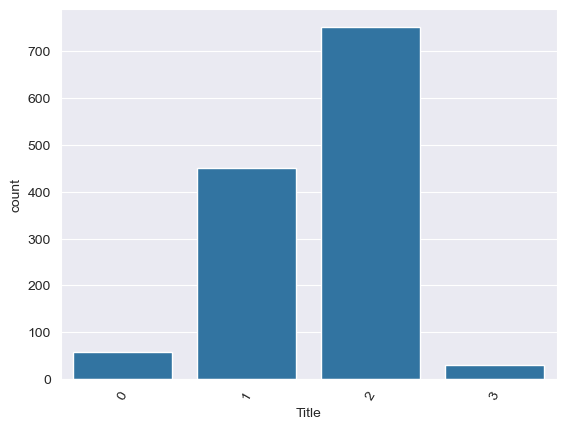

In [200]:
g = sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

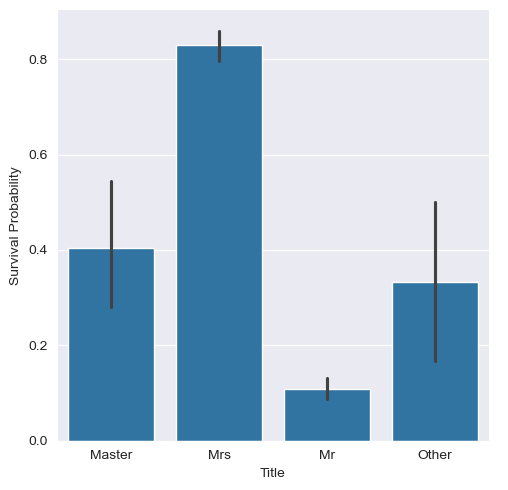

In [201]:
g = sns.catplot(x = "Title", y = "Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [202]:
train_df.drop(labels=["Name"], axis=1,inplace=True)

In [203]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1289 non-null   int64  
 1   Survived     1289 non-null   int64  
 2   Pclass       1289 non-null   int64  
 3   Sex          1289 non-null   object 
 4   Age          1289 non-null   float64
 5   SibSp        1289 non-null   int64  
 6   Parch        1289 non-null   int64  
 7   Ticket       1289 non-null   object 
 8   Fare         1288 non-null   float64
 9   Cabin        292 non-null    object 
 10  Embarked     1289 non-null   object 
 11  Title        1289 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 121.0+ KB


In [204]:
train_df = pd.get_dummies(train_df, columns=["Title"], dtype=int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


### Family Size

In [205]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1289 non-null   int64  
 1   Survived     1289 non-null   int64  
 2   Pclass       1289 non-null   int64  
 3   Sex          1289 non-null   object 
 4   Age          1289 non-null   float64
 5   SibSp        1289 non-null   int64  
 6   Parch        1289 non-null   int64  
 7   Ticket       1289 non-null   object 
 8   Fare         1288 non-null   float64
 9   Cabin        292 non-null    object 
 10  Embarked     1289 non-null   object 
 11  Title_0      1289 non-null   int32  
 12  Title_1      1289 non-null   int32  
 13  Title_2      1289 non-null   int32  
 14  Title_3      1289 non-null   int32  
dtypes: float64(2), int32(4), int64(5), object(4)
memory usage: 131.0+ KB


In [206]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [207]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1289 non-null   int64  
 1   Survived     1289 non-null   int64  
 2   Pclass       1289 non-null   int64  
 3   Sex          1289 non-null   object 
 4   Age          1289 non-null   float64
 5   SibSp        1289 non-null   int64  
 6   Parch        1289 non-null   int64  
 7   Ticket       1289 non-null   object 
 8   Fare         1288 non-null   float64
 9   Cabin        292 non-null    object 
 10  Embarked     1289 non-null   object 
 11  Title_0      1289 non-null   int32  
 12  Title_1      1289 non-null   int32  
 13  Title_2      1289 non-null   int32  
 14  Title_3      1289 non-null   int32  
 15  Fsize        1289 non-null   int64  
dtypes: float64(2), int32(4), int64(6), object(4)
memory usage: 141.1+ KB


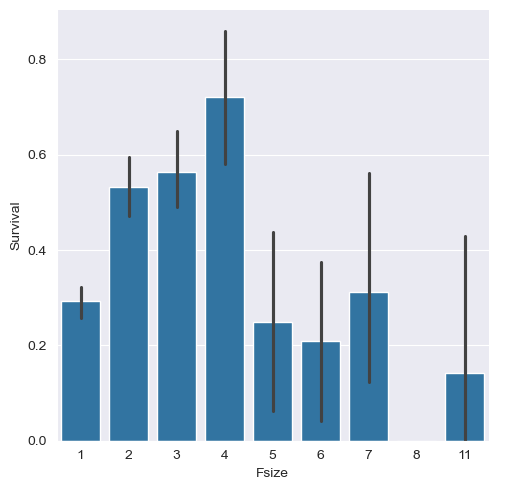

In [208]:
g = sns.catplot(x = "Fsize", y = "Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [209]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


In [210]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1289 non-null   int64  
 1   Survived     1289 non-null   int64  
 2   Pclass       1289 non-null   int64  
 3   Sex          1289 non-null   object 
 4   Age          1289 non-null   float64
 5   SibSp        1289 non-null   int64  
 6   Parch        1289 non-null   int64  
 7   Ticket       1289 non-null   object 
 8   Fare         1288 non-null   float64
 9   Cabin        292 non-null    object 
 10  Embarked     1289 non-null   object 
 11  Title_0      1289 non-null   int32  
 12  Title_1      1289 non-null   int32  
 13  Title_2      1289 non-null   int32  
 14  Title_3      1289 non-null   int32  
 15  Fsize        1289 non-null   int64  
 16  family_size  1289 non-null   int64  
dtypes: float64(2), int32(4), int64(7), object(4)
memory usage: 151.2+ KB


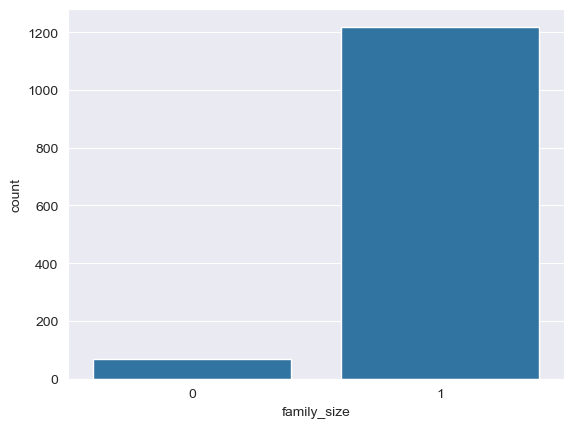

In [211]:
sns.countplot(x = "family_size", data=train_df)
plt.show()

In [212]:
train_df = pd.get_dummies(train_df, columns=["family_size"], dtype=int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1289 non-null   int64  
 1   Survived       1289 non-null   int64  
 2   Pclass         1289 non-null   int64  
 3   Sex            1289 non-null   object 
 4   Age            1289 non-null   float64
 5   SibSp          1289 non-null   int64  
 6   Parch          1289 non-null   int64  
 7   Ticket         1289 non-null   object 
 8   Fare           1288 non-null   float64
 9   Cabin          292 non-null    object 
 10  Embarked       1289 non-null   object 
 11  Title_0        1289 non-null   int32  
 12  Title_1        1289 non-null   int32  
 13  Title_2        1289 non-null   int32  
 14  Title_3        1289 non-null   int32  
 15  Fsize          1289 non-null   int64  
 16  family_size_0  1289 non-null   int32  
 17  family_size_1  1289 non-null   int32  
dtypes: float

### Embarked

In [213]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

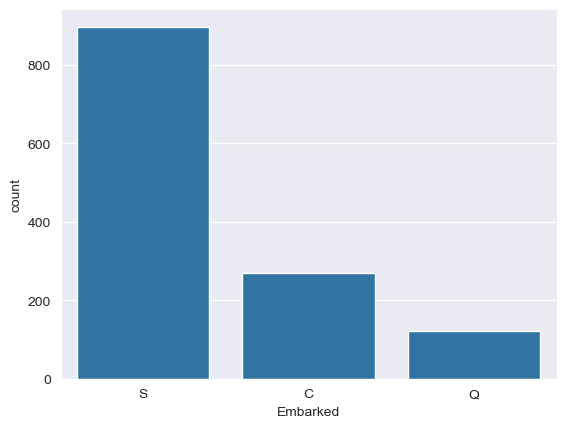

In [214]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [215]:
train_df = pd.get_dummies(train_df, columns=["Embarked"], dtype=int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [216]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1289 non-null   int64  
 1   Survived       1289 non-null   int64  
 2   Pclass         1289 non-null   int64  
 3   Sex            1289 non-null   object 
 4   Age            1289 non-null   float64
 5   SibSp          1289 non-null   int64  
 6   Parch          1289 non-null   int64  
 7   Ticket         1289 non-null   object 
 8   Fare           1288 non-null   float64
 9   Cabin          292 non-null    object 
 10  Title_0        1289 non-null   int32  
 11  Title_1        1289 non-null   int32  
 12  Title_2        1289 non-null   int32  
 13  Title_3        1289 non-null   int32  
 14  Fsize          1289 non-null   int64  
 15  family_size_0  1289 non-null   int32  
 16  family_size_1  1289 non-null   int32  
 17  Embarked_C     1289 non-null   int32  
 18  Embarked

### PClass

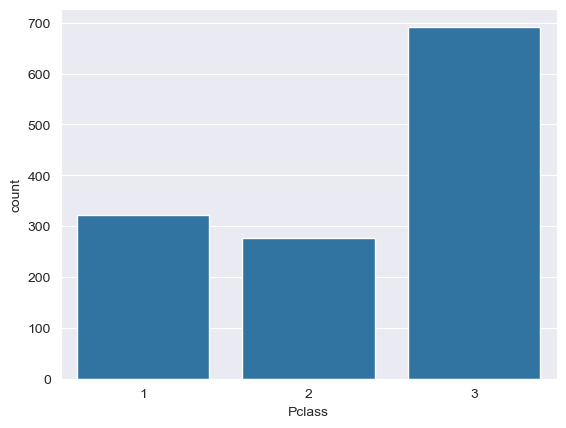

In [217]:
sns.countplot(x="Pclass", data=train_df)
plt.show()

In [218]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"], dtype=int)
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,...,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,2,0,1,0,0,1,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,0,...,0,2,0,1,1,0,0,1,0,0
2,3,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,0,1,0,1,0,0,1,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,0,...,0,2,0,1,0,0,1,1,0,0
4,5,0,male,35.0,0,0,373450,8.0500,NaN,0,...,0,1,0,1,0,0,1,0,0,1


### Sex

In [219]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"], dtype=int)
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,...,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,...,0,1,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,PC 17599,71.2833,C85,0,1,...,0,1,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,1,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,113803,53.1000,C123,0,1,...,0,1,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,373450,8.0500,NaN,0,0,...,0,1,0,0,1,0,0,1,0,1


In [220]:
# Cabin numarası olmayanları 0 ile dolduruyorum. Bu feature'ı da bir sınıf olarak kabul edeceğim.

train_df['Has_Cabin'] = np.where(train_df['Cabin'].notnull(), 1, 0)
#X_test['Has_Cabin'] = np.where(X_test['Cabin'].notnull(), 1, 0)

train_df.drop('Cabin', axis=1, inplace=True)
#X_test.drop('Cabin', axis=1, inplace=True)

train_df.info()
#X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1289 non-null   int64  
 1   Survived       1289 non-null   int64  
 2   Age            1289 non-null   float64
 3   SibSp          1289 non-null   int64  
 4   Parch          1289 non-null   int64  
 5   Ticket         1289 non-null   object 
 6   Fare           1288 non-null   float64
 7   Title_0        1289 non-null   int32  
 8   Title_1        1289 non-null   int32  
 9   Title_2        1289 non-null   int32  
 10  Title_3        1289 non-null   int32  
 11  Fsize          1289 non-null   int64  
 12  family_size_0  1289 non-null   int32  
 13  family_size_1  1289 non-null   int32  
 14  Embarked_C     1289 non-null   int32  
 15  Embarked_Q     1289 non-null   int32  
 16  Embarked_S     1289 non-null   int32  
 17  Pclass_1       1289 non-null   int32  
 18  Pclass_2

## Fare -- Missing Value

In [221]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Title_0,Title_1,Title_2,...,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Has_Cabin
1030,1044,0,60.5,0,0,3701,NaN,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [222]:
train_df.dropna(subset=["Fare"], inplace=True)
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Title_0,Title_1,Title_2,...,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Has_Cabin


In [223]:
# Ticket ve PassengerId'in tamamen gereksiz featurelar olduğunu düşünüyorum. Bunları modele veri olarak vermyeceğim.
train_df.drop(labels=["Ticket", "PassengerId", "Fsize"], axis=1, inplace=True)

In [224]:
corr_matrix = train_df.corr()
print(corr_matrix["Survived"].abs().sort_values(ascending=False))

Survived         1.000000
Sex_female       0.689912
Sex_male         0.689912
Title_1          0.681220
Title_2          0.659072
Has_Cabin        0.254650
Pclass_3         0.241678
Fare             0.232152
Pclass_1         0.231813
Embarked_S       0.138430
Embarked_C       0.125524
Parch            0.111568
family_size_0    0.080989
family_size_1    0.080989
Pclass_2         0.049333
Embarked_Q       0.043037
Age              0.035061
Title_3          0.014258
SibSp            0.011969
Title_0          0.011273
Name: Survived, dtype: float64


# Modeling

### KNN ile Model Eğitimi

In [225]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Train Test Split

In [226]:
train = train_df.copy()

X_train = train.drop(labels="Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

print(f"X train: {len(X_train)}")
print(f"X test: {len(X_test)}")
print(f"Y train: {len(y_train)}")
print(f"Y test: {len(y_train)}")

X train: 862
X test: 426
Y train: 862
Y test: 862


## Simple Logistic Regression

In [227]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log_train = round(logreg.score(X_train, y_train)*100, 2)
acc_log_test = round(logreg.score(X_test, y_test)* 100,2)

print(f"Train accuracy score: {acc_log_train}")
print(f"Test accuracy score: {acc_log_test}")

Train accuracy score: 88.52
Test accuracy score: 85.45


## HyperParameter Tuning -- Grid Search -- CrossValidation

We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.
- Decision Tree
- SVM
- Random Forest
- KNN
- Logistic Regression

In [228]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 935 to 1127
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            862 non-null    float64
 1   SibSp          862 non-null    int64  
 2   Parch          862 non-null    int64  
 3   Fare           862 non-null    float64
 4   Title_0        862 non-null    int32  
 5   Title_1        862 non-null    int32  
 6   Title_2        862 non-null    int32  
 7   Title_3        862 non-null    int32  
 8   family_size_0  862 non-null    int32  
 9   family_size_1  862 non-null    int32  
 10  Embarked_C     862 non-null    int32  
 11  Embarked_Q     862 non-null    int32  
 12  Embarked_S     862 non-null    int32  
 13  Pclass_1       862 non-null    int32  
 14  Pclass_2       862 non-null    int32  
 15  Pclass_3       862 non-null    int32  
 16  Sex_female     862 non-null    int32  
 17  Sex_male       862 non-null    int32  
 18  Has_Cabin   

In [229]:
random_state = 42
classifiers = [DecisionTreeClassifier(random_state=random_state),
               SVC(random_state=random_state),
               RandomForestClassifier(random_state=random_state),
               LogisticRegression(random_state=random_state),
               KNeighborsClassifier()]


dt_param_grid = {"min_samples_split": range(10,100,5),
                 "max_depth": range(1, 20, 1)}

svc_param_grid = {"kernel": ["rbf"],
                  "gamma": [0.001, 0.01, 0.1, 1],
                  "C": [1, 10, 50, 100, 200, 300, 1000]}

rf_param_grid = {"max_features": [2, 5, 8, 10, 12], # Rastgele Feature Bölümleme
                 "min_samples_split": [10, 25, 50],
                 "min_samples_leaf": [5, 20, 40],
                 "bootstrap": [True],
                 "n_estimators": [50, 100, 150, 200, 250, 300],
                 "criterion": ["gini"]}

logreg_param_grid = {"C": np.logspace(-3,3,7),
                     "penalty": ["l1", "l2"],
                     "solver": ["liblinear"]}

knn_param_grid = {"n_neighbors": np.linspace(1, 19, num=10, dtype=int).tolist(),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan"]}

classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    logreg_param_grid,
                    knn_param_grid]

In [230]:
cv_result = []
best_estimators = []
for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grid=classifier_param[i], cv=StratifiedKFold(n_splits=10), scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(X_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 342 candidates, totalling 3420 fits
0.8746591820368884
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8642074311681368
Fitting 10 folds for each of 270 candidates, totalling 2700 fits
0.8816359262229352
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8816359262229352
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8063084736701416


In [231]:
cv_results = pd.DataFrame({"Cross Validation Accuracy Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM", "RandomForestTree", "LogisticRegression", "KNN"]})
cv_results

,Cross Validation Accuracy Means,ML Models
0,0.874659,DecisionTreeClassifier
1,0.864207,SVM
2,0.881636,RandomForestTree
3,0.881636,LogisticRegression
4,0.806308,KNN


In [232]:
best_estimators_df = pd.DataFrame({"Cross Validation Best Estimator Parameters": best_estimators, "ML Models": ["DecisionTreeClassifier", "SVM", "RandomForestTree", "LogisticRegression", "KNN"]})
best_estimators_df

,Cross Validation Best Estimator Parameters,ML Models
0,"DecisionTreeClassifier(max_depth=3, min_sample...",DecisionTreeClassifier
1,"SVC(C=100, gamma=0.001, random_state=42)",SVM
2,"(DecisionTreeClassifier(max_features=2, min_sa...",RandomForestTree
3,"LogisticRegression(C=10.0, penalty='l1', rando...",LogisticRegression
4,KNeighborsClassifier(metric='manhattan'),KNN


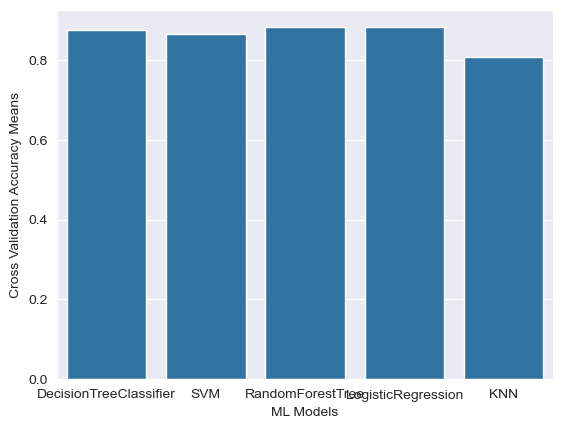

In [233]:
s = sns.barplot(cv_results, x="ML Models", y="Cross Validation Accuracy Means")

## Ensemble Modeling

In [234]:
# 3 farklı classifier'ın oylama yöntemi ile karar verilmesi...
votingC = VotingClassifier(estimators=[("dt", best_estimators[0]), ("rfc", best_estimators[2]), ("lr", best_estimators[3])], voting="soft", n_jobs=-1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test), y_test))

0.852112676056338
